# 1) Overview 

- Optimization technique = dynamic programming 
> solve a problem with a limited scenario, iterative rule to expand to larger problems 

- Solve for optimal price, given that only 1 day is available to sell tickets BEFORE flights
> apply to longer time-horizons 1 day at a time 

- Value function = best outcome achievable from any singular input state 
> v(tickets remaining, days remaining) = best revenue expected for a given number of tickets and days 

- Q function = includes decision input and expected revenue if it is not based on optimal decision policy
> Q function output for T+1 days = dependent on sum of revenue from flights sold that day, revenue earned in the previous days. 

# 2) Strategy 

- Start near flight time 
- Iteratively work backwards 
- Check revenue from previous days from value function 
- Single choice variable in this dynamic programming problem is price or quantity

### 2.1) Q & V

- After obtaining Q at T + 1
- Compute V on the same day by checking revenue associated with best decision from Q function 
- Q includes current revenue calculation & V(leftover tickets)

# 3) Base case (1-day sale) 

#### *Given that *
- Qty = demand - price 

#### *find price and quantity that maximizes *
- Revenue = price * Qty

#### *Re-arrange Qty equation to solve for price (single choice variable)*
- Price = demand - Qty 

#### *Plug price into revenue equation*
- Revenue = (demand - Qty) * Qty

### 3.1) Demand & Revenue 

- Demand = given number when making daily price decisions 
- Plot revenue as equation dependent on Qty

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


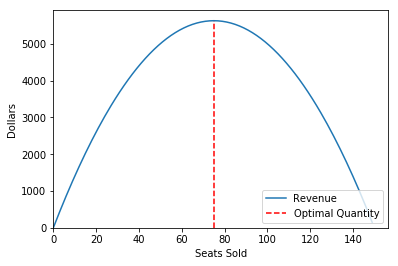

In [1]:
import matplotlib.pyplot as plt
import numpy as np

demand_level = 150
# only plot quantities up to demand_level. That's point where price becomes 0
revenue = [(demand_level - q) * q for q in range(demand_level)]

# Make primary plot
plt.plot(revenue, label="Revenue")
plt.xlabel("Seats Sold")
plt.ylabel("Dollars")
plt.ylim(ymin=0)
plt.xlim(xmin=0)

# Show the revenue maximizing quantity
optimal_q = np.argmax(revenue)
plt.vlines(x = optimal_q, 
           ymin=0, ymax = max(revenue), color = 'red', linestyle = "--", 
           label="Optimal Quantity")

plt.legend(loc = 'lower right')
plt.show()

# 4) Q & V functions 

- Values of Q & V can be stored in numpy arrays 
> indexed by inputs 

- Q input = demand (variable affecting decision)

- Demand is unknown in future days, even if V is used to examine potential revenue on those days 
> Develop 'expected value' by averaging over future revenue from a specified demand range 

- Discretize demand range 
> evenly spread values 

In [2]:
n_demand_levels = 11
min_demand_level = 100
max_demand_level = 150
demand_levels = np.linspace(min_demand_level, max_demand_level, n_demand_levels)

max_tickets = 150
max_days = 100

# Q indices are: n_sold in day, tickets_left to start day, demand_level, days_left
Q = np.zeros([max_tickets, max_tickets, n_demand_levels, max_days])
# V indices are: n_left and n_days
V = np.zeros([max_tickets, max_days])


# 5) Base case: 1 day remaining 

- last day remaining, no concern for future values 

In [3]:
for tickets_left in range(max_tickets):
    for tickets_sold in range(tickets_left+1): # add 1 to offset 0 indexing. Allow selling all tickets
        for demand_index, demand_level in enumerate(demand_levels):
            # Never set negative prices
            price = max(demand_level - tickets_sold, 0)
            Q[tickets_sold, tickets_left, demand_index, 0] = price * tickets_sold
    # For each demand_level, choose the optimum number to sell. Output of this is array .of size n_demand_levels
    revenue_from_best_quantity_at_each_demand_level = Q[:, tickets_left, :, 0].max(axis=0)
    # take the average, since we don't know demand level ahead of time and all are equally likely
    V[tickets_left, 0] = revenue_from_best_quantity_at_each_demand_level.mean()

# 6) Solving for other time horizons 

- Iteratively calc Q & V for previous periods 

In [4]:
for days_left in range(1, max_days):
    for tickets_left in range(max_tickets):
        for tickets_sold in range(tickets_left):
            for demand_index, demand_level in enumerate(demand_levels):
                price = max(demand_level - tickets_sold, 0)
                rev_today = price * tickets_sold
                Q[tickets_sold, tickets_left, demand_index, days_left] = rev_today + V[tickets_left-tickets_sold, days_left-1]
        expected_total_rev_from_best_quantity_at_each_demand_level = Q[:, tickets_left, :, days_left].max(axis=0)
        V[tickets_left, days_left] = expected_total_rev_from_best_quantity_at_each_demand_level.mean()


For any given number of tickets, days_left and demand_level, look in **Q** to find the number of tickets with the highest Q-value.

Use pricing function to implement that:

In [5]:
def pricing_function(days_left, tickets_left, demand_level):
    demand_level_index = np.abs(demand_level - demand_levels).argmin()
    day_index = days_left - 1 # arrays are 0 indexed
    tickets_index = int(tickets_left)  # in case it comes in as float, but need to index with it
    relevant_Q_vals = Q[:, tickets_index, demand_level_index, day_index]
    desired_quantity = relevant_Q_vals.argmax()# offset 0 indexing
    price = demand_level - desired_quantity
    return price

# 7) Score

In [6]:
import sys
sys.path.append("../input")
from flight_revenue_simulator import simulate_revenue, score_me

score_me(pricing_function)

Ran 200 flights starting 100 days before flight with 100 tickets. Average revenue: $16790
Ran 200 flights starting 14 days before flight with 50 tickets. Average revenue: $7958
Ran 200 flights starting 2 days before flight with 20 tickets. Average revenue: $2851
Ran 200 flights starting 1 days before flight with 3 tickets. Average revenue: $431


<IPython.core.display.Javascript object>

Average revenue across all flights is $7008
